In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ilyar\AppData\Local\Temp\ipykernel_7472\1273368675.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Attributes:

buying: vhigh, high, med, low. (buying price)
maint: vhigh, high, med, low. (maintenance price)
doors: 2, 3, 4, 5more. (number of doors)
persons: 2, 4, more. (number of people that fit in the car
lug_boot: small, med, big. (luggage boot size)
safety: low, med, high. (safety rating)
decision: unacc, acc, good, vgood. (decision: unacceptable, acceptable, good, very good)

In [2]:
data = 'car_evaluation.csv'
df = pd.read_csv(data)

In [3]:
df.shape

(1727, 7)

In [4]:
df['unacc'].value_counts()

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [5]:
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buy_price', 'maint_cost', 'doors', 'persons', 'lug_size', 'safety_rating', 'acceptance']
df.columns = col_names
df.columns

Index(['buy_price', 'maint_cost', 'doors', 'persons', 'lug_size',
       'safety_rating', 'acceptance'],
      dtype='object')

In [7]:
df.head(5)

,buy_price,maint_cost,doors,persons,lug_size,safety_rating,acceptance
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buy_price      1727 non-null   object
 1   maint_cost     1727 non-null   object
 2   doors          1727 non-null   object
 3   persons        1727 non-null   object
 4   lug_size       1727 non-null   object
 5   safety_rating  1727 non-null   object
 6   acceptance     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.describe()

,buy_price,maint_cost,doors,persons,lug_size,safety_rating,acceptance
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [10]:
df.isnull().sum()

buy_price        0
maint_cost       0
doors            0
persons          0
lug_size         0
safety_rating    0
acceptance       0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('acceptance', axis=1), df['acceptance'], test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1381, 6), (346, 6), (1381,), (346,))

In [13]:
# ! pip install --upgrade category_encoders

In [14]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buy_price', 'maint_cost', 'doors', 'persons', 'lug_size', 'safety_rating'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [15]:
X_train.head()

,buy_price,maint_cost,doors,persons,lug_size,safety_rating
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [16]:
X_test.head()

,buy_price,maint_cost,doors,persons,lug_size,safety_rating
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
entropy_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

entropy_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [19]:
y_pred_entropy = entropy_classifier.predict(X_test)

In [20]:

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.7688


In [21]:
y_pred_train_entropy = entropy_classifier.predict(X_train)
y_pred_train_entropy

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [22]:
print('Training set score: {:.4f}'.format(entropy_classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(entropy_classifier.score(X_test, y_test)))

Training set score: 0.7922
Test set score: 0.7688


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'entropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]')]

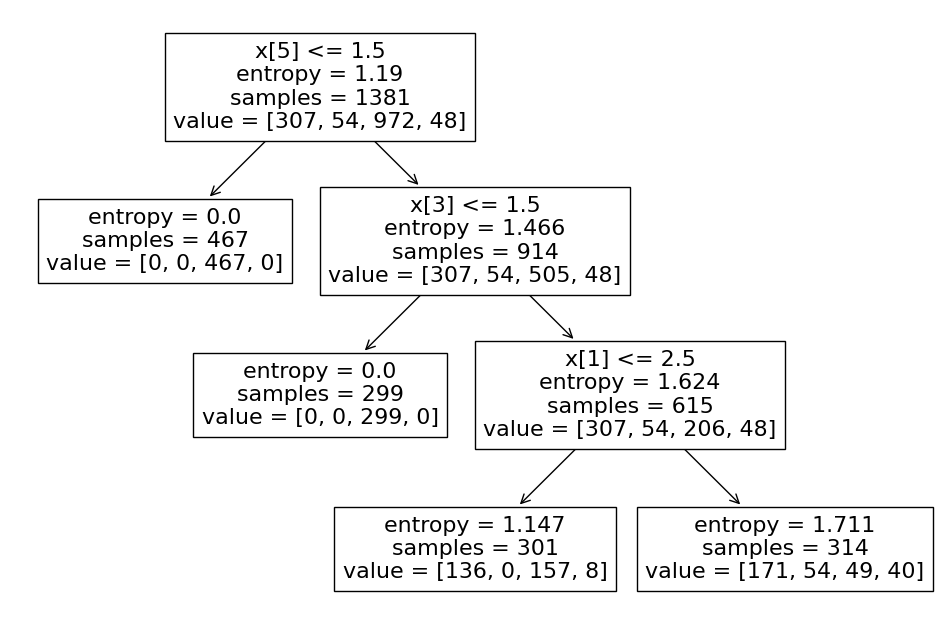

In [23]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(entropy_classifier.fit(X_train, y_train)) 

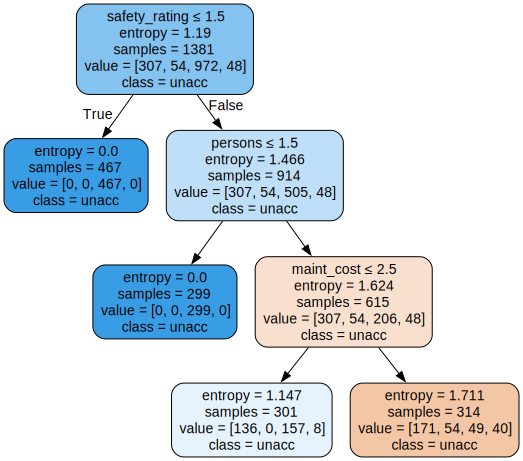

In [24]:
import graphviz

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz-10.0.1-win64/bin'

dot_data = tree.export_graphviz(entropy_classifier, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_entropy)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 36   0  41   0]
 [ 15   0   0   0]
 [  7   0 230   0]
 [ 12   0   5   0]]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.51      0.47      0.49        77
        good       0.00      0.00      0.00        15
       unacc       0.83      0.97      0.90       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.77       346
   macro avg       0.34      0.36      0.35       346
weighted avg       0.69      0.77      0.72       346


C:\Users\ilyar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilyar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilyar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [27]:
# TODO: make on some other dataset